#### 리마인드
- layers ; 각 레이어를 구성하는 툴
- models ; 레이어를 합쳐 하나의 모델로 만드는 툴

#### batch, epoch
- 지금은 Nin 길이의 1차원 벡터를 입력하는데
- 보통은 Nb(batch) x Nin 행렬
- **batch** 크기는 한 번에 일괄 처리되는 데이터 수를 의미하고
- **epoch**당 **batch**가 처리되는 횟수는 전체 학습 데이터 수에 batch size를 나눈 만큼임

In [1]:
from keras import layers, models

class ANN(models.Model):
    def __init__(self, Nin, Nh, Nout):
        hidden = layers.Dense(Nh)
        output = layers.Dense(Nout)
        relu = layers.Activation('relu')
        
        x = layers.Input(shape=(Nin,))
        h = relu(hidden(x))
        y = output(h) # regression에선 output에 activation을 걸지 않음
        
        super().__init__(x, y)
        self.compile(loss='mse', optimizer='sgd')

Using TensorFlow backend.


In [2]:
from keras import datasets
from sklearn import preprocessing

def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.boston_housing.load_data()
    scaler = preprocessing.MinMaxScaler() # 0~1 정규화
    X_train = scaler.fit_transform(X_train) # 학습과 변환
    X_test = scaler.transform(X_test) # 변환만
    return (X_train, y_train), (X_test, y_test)

In [3]:
from keraspp.skeras import plot_loss
import matplotlib.pyplot as plt

def main():
    Nin = 13
    Nh = 5
    Nout = 1
    
    model = ANN(Nin, Nh, Nout)
    (X_train, y_train), (X_test, y_test) = Data_func()
    history = model.fit(X_train, y_train, epochs=100, batch_size=100, validation_split=0.2, verbose=2)
    
    performance_test = model.evaluate(X_test, y_test, batch_size=100)
    print('\nTest Loss -> {:.2f}'.format(performance_test))
    
    plot_loss(history) # 분류 문제와 달리 acc은 메트릭으로 포함 x
    plt.show()

Train on 323 samples, validate on 81 samples
Epoch 1/100
 - 0s - loss: 349.7378 - val_loss: 97.2531
Epoch 2/100
 - 0s - loss: 98.5468 - val_loss: 79.3504
Epoch 3/100
 - 0s - loss: 75.3559 - val_loss: 71.5273
Epoch 4/100
 - 0s - loss: 64.9895 - val_loss: 77.6851
Epoch 5/100
 - 0s - loss: 61.0948 - val_loss: 58.1453
Epoch 6/100
 - 0s - loss: 61.9287 - val_loss: 82.2177
Epoch 7/100
 - 0s - loss: 86.3973 - val_loss: 55.8795
Epoch 8/100
 - 0s - loss: 51.9888 - val_loss: 88.6247
Epoch 9/100
 - 0s - loss: 65.4041 - val_loss: 65.7281
Epoch 10/100
 - 0s - loss: 49.7948 - val_loss: 54.7900
Epoch 11/100
 - 0s - loss: 45.0329 - val_loss: 49.7244
Epoch 12/100
 - 0s - loss: 42.6519 - val_loss: 42.7367
Epoch 13/100
 - 0s - loss: 40.8031 - val_loss: 53.4419
Epoch 14/100
 - 0s - loss: 44.8787 - val_loss: 43.6133
Epoch 15/100
 - 0s - loss: 42.2113 - val_loss: 43.8104
Epoch 16/100
 - 0s - loss: 36.1703 - val_loss: 41.3092
Epoch 17/100
 - 0s - loss: 34.8823 - val_loss: 36.4026
Epoch 18/100
 - 0s - loss: 3

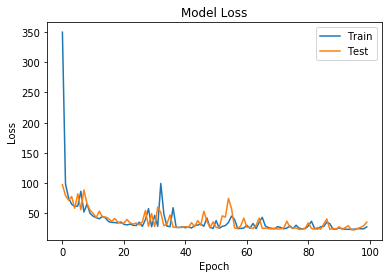

In [4]:
main()